In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Obesity_Classification.csv")

df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
df.drop(columns=["ID"], inplace=True)
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


<Axes: >

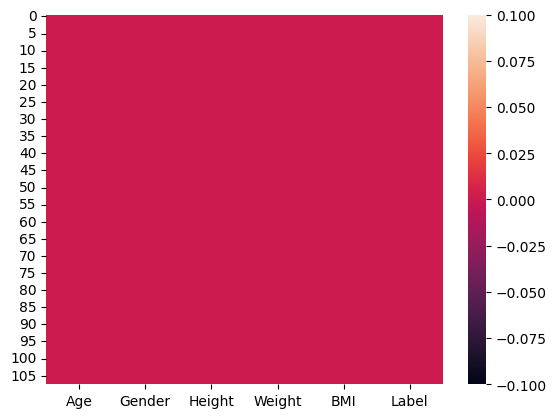

In [4]:
sns.heatmap(df.isna())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.2+ KB


In [6]:
df.isna().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [7]:
df.Label.unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [8]:
df = pd.get_dummies(df, columns=["Gender"])

df.Label = df.Label.map({'Normal Weight': 1, 'Overweight' : 2, 'Underweight' : 3, 'Obese': 4})

In [9]:
df.head()

,Age,Height,Weight,BMI,Label,Gender_Female,Gender_Male
0,25,175,80,25.3,1,False,True
1,30,160,60,22.5,1,True,False
2,35,180,90,27.3,2,False,True
3,40,150,50,20.0,3,True,False
4,45,190,100,31.2,4,False,True


<Axes: >

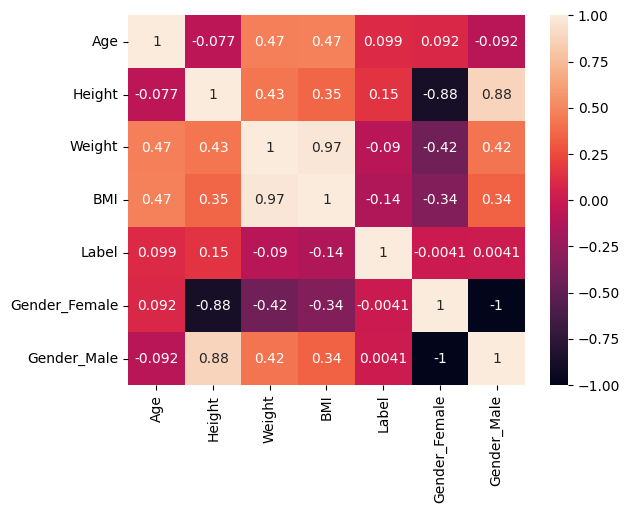

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            108 non-null    int64  
 1   Height         108 non-null    int64  
 2   Weight         108 non-null    int64  
 3   BMI            108 non-null    float64
 4   Label          108 non-null    int64  
 5   Gender_Female  108 non-null    bool   
 6   Gender_Male    108 non-null    bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 4.6 KB


In [12]:
df.head()

,Age,Height,Weight,BMI,Label,Gender_Female,Gender_Male
0,25,175,80,25.3,1,False,True
1,30,160,60,22.5,1,True,False
2,35,180,90,27.3,2,False,True
3,40,150,50,20.0,3,True,False
4,45,190,100,31.2,4,False,True


In [13]:
df.columns

Index(['Age', 'Height', 'Weight', 'BMI', 'Label', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [14]:
X = df.drop(columns="Label")
y = df.Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00        23
   Overweight       1.00      1.00      1.00        16
  Underweight       1.00      1.00      1.00        39
        Obese       1.00      1.00      1.00         8

     accuracy                           1.00        86
    macro avg       1.00      1.00      1.00        86
 weighted avg       1.00      1.00      1.00        86



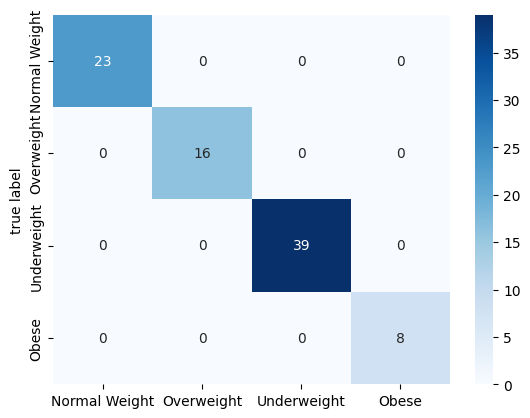

In [16]:
y_pred = model.predict(X_train)

train_cm = confusion_matrix(y_train, y_pred)
sns.heatmap(train_cm, annot=True, cmap="Blues", xticklabels=['Normal Weight', 'Overweight', 'Underweight', 'Obese'], yticklabels=['Normal Weight', 'Overweight', 'Underweight', 'Obese'])
plt.ylabel("predicted label")
plt.ylabel("true label")

print(classification_report(y_train, y_pred, target_names=['Normal Weight', 'Overweight', 'Underweight', 'Obese']))

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
   Overweight       1.00      1.00      1.00         4
  Underweight       1.00      1.00      1.00         8
        Obese       1.00      1.00      1.00         4

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



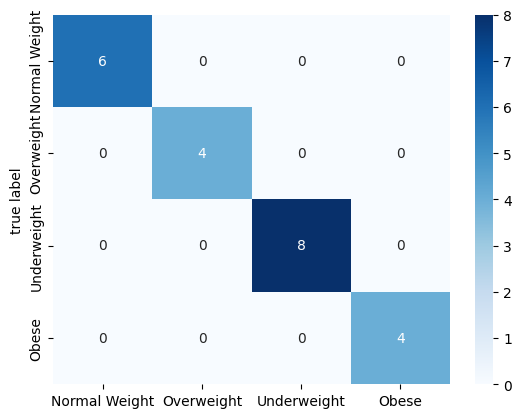

In [17]:
y_pred = model.predict(X_test)

train_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(train_cm, annot=True, cmap="Blues", xticklabels=['Normal Weight', 'Overweight', 'Underweight', 'Obese'], yticklabels=['Normal Weight', 'Overweight', 'Underweight', 'Obese'])
plt.ylabel("predicted label")
plt.ylabel("true label")

print(classification_report(y_test, y_pred, target_names=['Normal Weight', 'Overweight', 'Underweight', 'Obese']))

[Text(0.3333333333333333, 0.9166666666666666, 'Weight <= 52.5\ngini = 0.68\nsamples = 86\nvalue = [23, 16, 39, 8]\nclass = Underweight'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39, 0]\nclass = Underweight'),
 Text(0.5, 0.75, 'BMI <= 24.6\ngini = 0.616\nsamples = 47\nvalue = [23, 16, 0, 8]\nclass = Normal Weight'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0]\nclass = Normal Weight'),
 Text(0.6666666666666666, 0.5833333333333334, 'Weight <= 97.5\ngini = 0.486\nsamples = 25\nvalue = [1, 16, 0, 8]\nclass = Overweight'),
 Text(0.5, 0.4166666666666667, 'Weight <= 82.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16, 0, 0]\nclass = Overweight'),
 Text(0.3333333333333333, 0.25, 'BMI <= 25.15\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 0]\nclass = Overweight'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]\nclass = Overweight'),
 Text(0.5, 0.08333333333333333, 'g

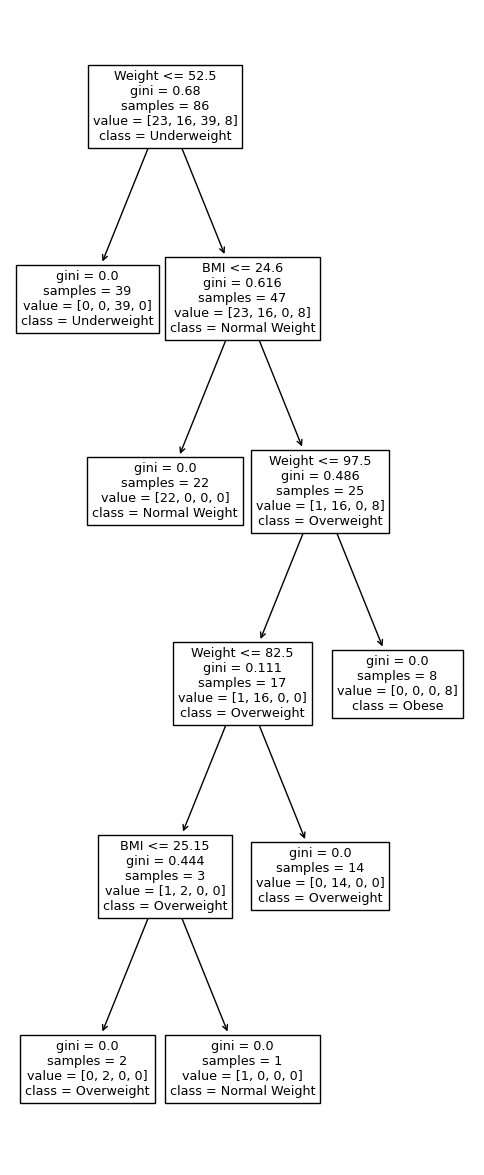

In [25]:
from sklearn import tree

plt.figure(figsize=(6, 15))
tree.plot_tree(model, feature_names=df.columns, class_names=['Normal Weight', 'Overweight', 'Underweight', 'Obese'])